### Load Dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/Users/wangxinyi/Desktop/Kickstarter.xlsx'
df = pd.read_excel(file_path)
df = df[df['state'].isin(['successful', 'failed'])]  # Filter for required states

### Feature Engineering

In [2]:
# Calculate USD values and ratios
df['goal_usd'] = df['goal'] * df['static_usd_rate']
df['pledged_usd'] = df['pledged'] * df['static_usd_rate']
df['funding_ratio_usd'] = df['pledged_usd'] / df['goal_usd']

# Create binary features
df['featured'] = (df['spotlight'] | df['staff_pick']).astype(int)
df['has_media'] = (df['video'] | df['show_feature_image']).astype(int)

# Log transformations for the converted financial metrics
for col in ['goal_usd', 'pledged_usd', 'backers_count']:
    df[f'log_{col}'] = np.log1p(df[col])

In [5]:
# Select features for clustering
features = [
    'log_goal_usd', 
    'log_pledged_usd', 
    'log_backers_count',
    'funding_ratio_usd',
    'show_feature_image',
    'staff_pick'
]

In [6]:
# Scale features
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Find Optimal Bundles

k = 2: Silhouette Score: 0.297
k = 3: Silhouette Score: 0.381
k = 4: Silhouette Score: 0.364
k = 5: Silhouette Score: 0.414
k = 6: Silhouette Score: 0.394
k = 7: Silhouette Score: 0.398
k = 8: Silhouette Score: 0.403
k = 9: Silhouette Score: 0.399
k = 10: Silhouette Score: 0.369


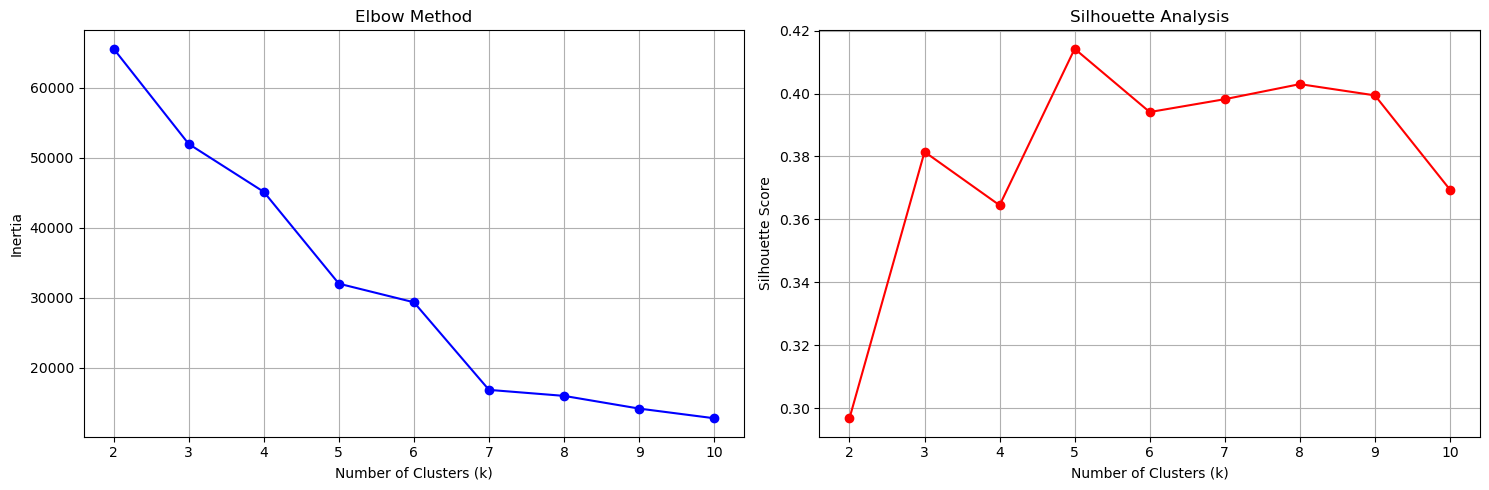

In [7]:
# Calculate silhouette scores and inertia (for elbow method)
silhouette_scores = []
inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Calculate silhouette score
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    
    # Calculate inertia (for elbow method)
    inertias.append(kmeans.inertia_)
    print(f"k = {k}: Silhouette Score: {score:.3f}")

# Create figure for elbow and silhouette plots
plt.figure(figsize=(15, 5))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(list(k_values), inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

# Silhouette plot
plt.subplot(1, 2, 2)
plt.plot(list(k_values), silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

plt.tight_layout()
plt.show()

### Perform Cluster

In [ ]:
# Perform final clustering with k=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

total_projects = len(df)
print(f"\nTotal Projects: {total_projects}")
    
# Cluster Analysis Function
def cluster_analysis(df, features, k):
    total_projects = len(df)
    print(f"\nTotal Projects: {total_projects}")
    for cluster in range(k):
        cluster_data = df[df['cluster'] == cluster]
        size = len(cluster_data)
        print(f"Cluster {cluster}:- Size: {size} projects ({size / total_projects:.2%})")
        print(f"- Size: {size} projects ({size / total_projects:.2%})")
        print(f"- Success Rate: {(cluster_data['state'] == 'successful').mean():.2%}")
        print(f"- Median Financial Metrics:")
        print(f"  Goal (USD): ${cluster_data['goal_usd'].median():,.2f}")
        print(f"  Pledged (USD): ${cluster_data['pledged_usd'].median():,.2f}")
        print(f"  Funding Ratio (USD): {cluster_data['funding_ratio_usd'].median():.2f}")
        print(f"- Video: {cluster_data['video'].mean():.2%}")
        print(f"- Image: {cluster_data['show_feature_image'].mean():.2%}")
        print(f"- Staff Pick: {cluster_data['staff_pick'].mean():.2%}")

cluster_analysis(df, features, optimal_k)


Total Projects: 14463

Total Projects: 14463
Cluster 0:- Size: 4672 projects (32.30%)
- Size: 4672 projects (32.30%)
- Success Rate: 74.87%
- Median Financial Metrics:
  Goal (USD): $7,500.00
  Pledged (USD): $6,603.10
  Funding Ratio (USD): 1.07
- Video: 78.98%
- Image: 0.00%
- Staff Pick: 0.00%
Cluster 1:- Size: 3623 projects (25.05%)
- Size: 3623 projects (25.05%)
- Success Rate: 0.00%
- Median Financial Metrics:
  Goal (USD): $10,000.00
  Pledged (USD): $21.00
  Funding Ratio (USD): 0.00
- Video: 51.92%
- Image: 0.00%
- Staff Pick: 0.03%
Cluster 2:- Size: 1934 projects (13.37%)
- Size: 1934 projects (13.37%)
- Success Rate: 91.21%
- Median Financial Metrics:
  Goal (USD): $7,509.31
  Pledged (USD): $10,194.67
  Funding Ratio (USD): 1.23
- Video: 84.23%
- Image: 0.00%
- Staff Pick: 100.00%
Cluster 3:- Size: 3752 projects (25.94%)
- Size: 3752 projects (25.94%)
- Success Rate: 69.48%
- Median Financial Metrics:
  Goal (USD): $652.09
  Pledged (USD): $732.26
  Funding Ratio (USD): 1.

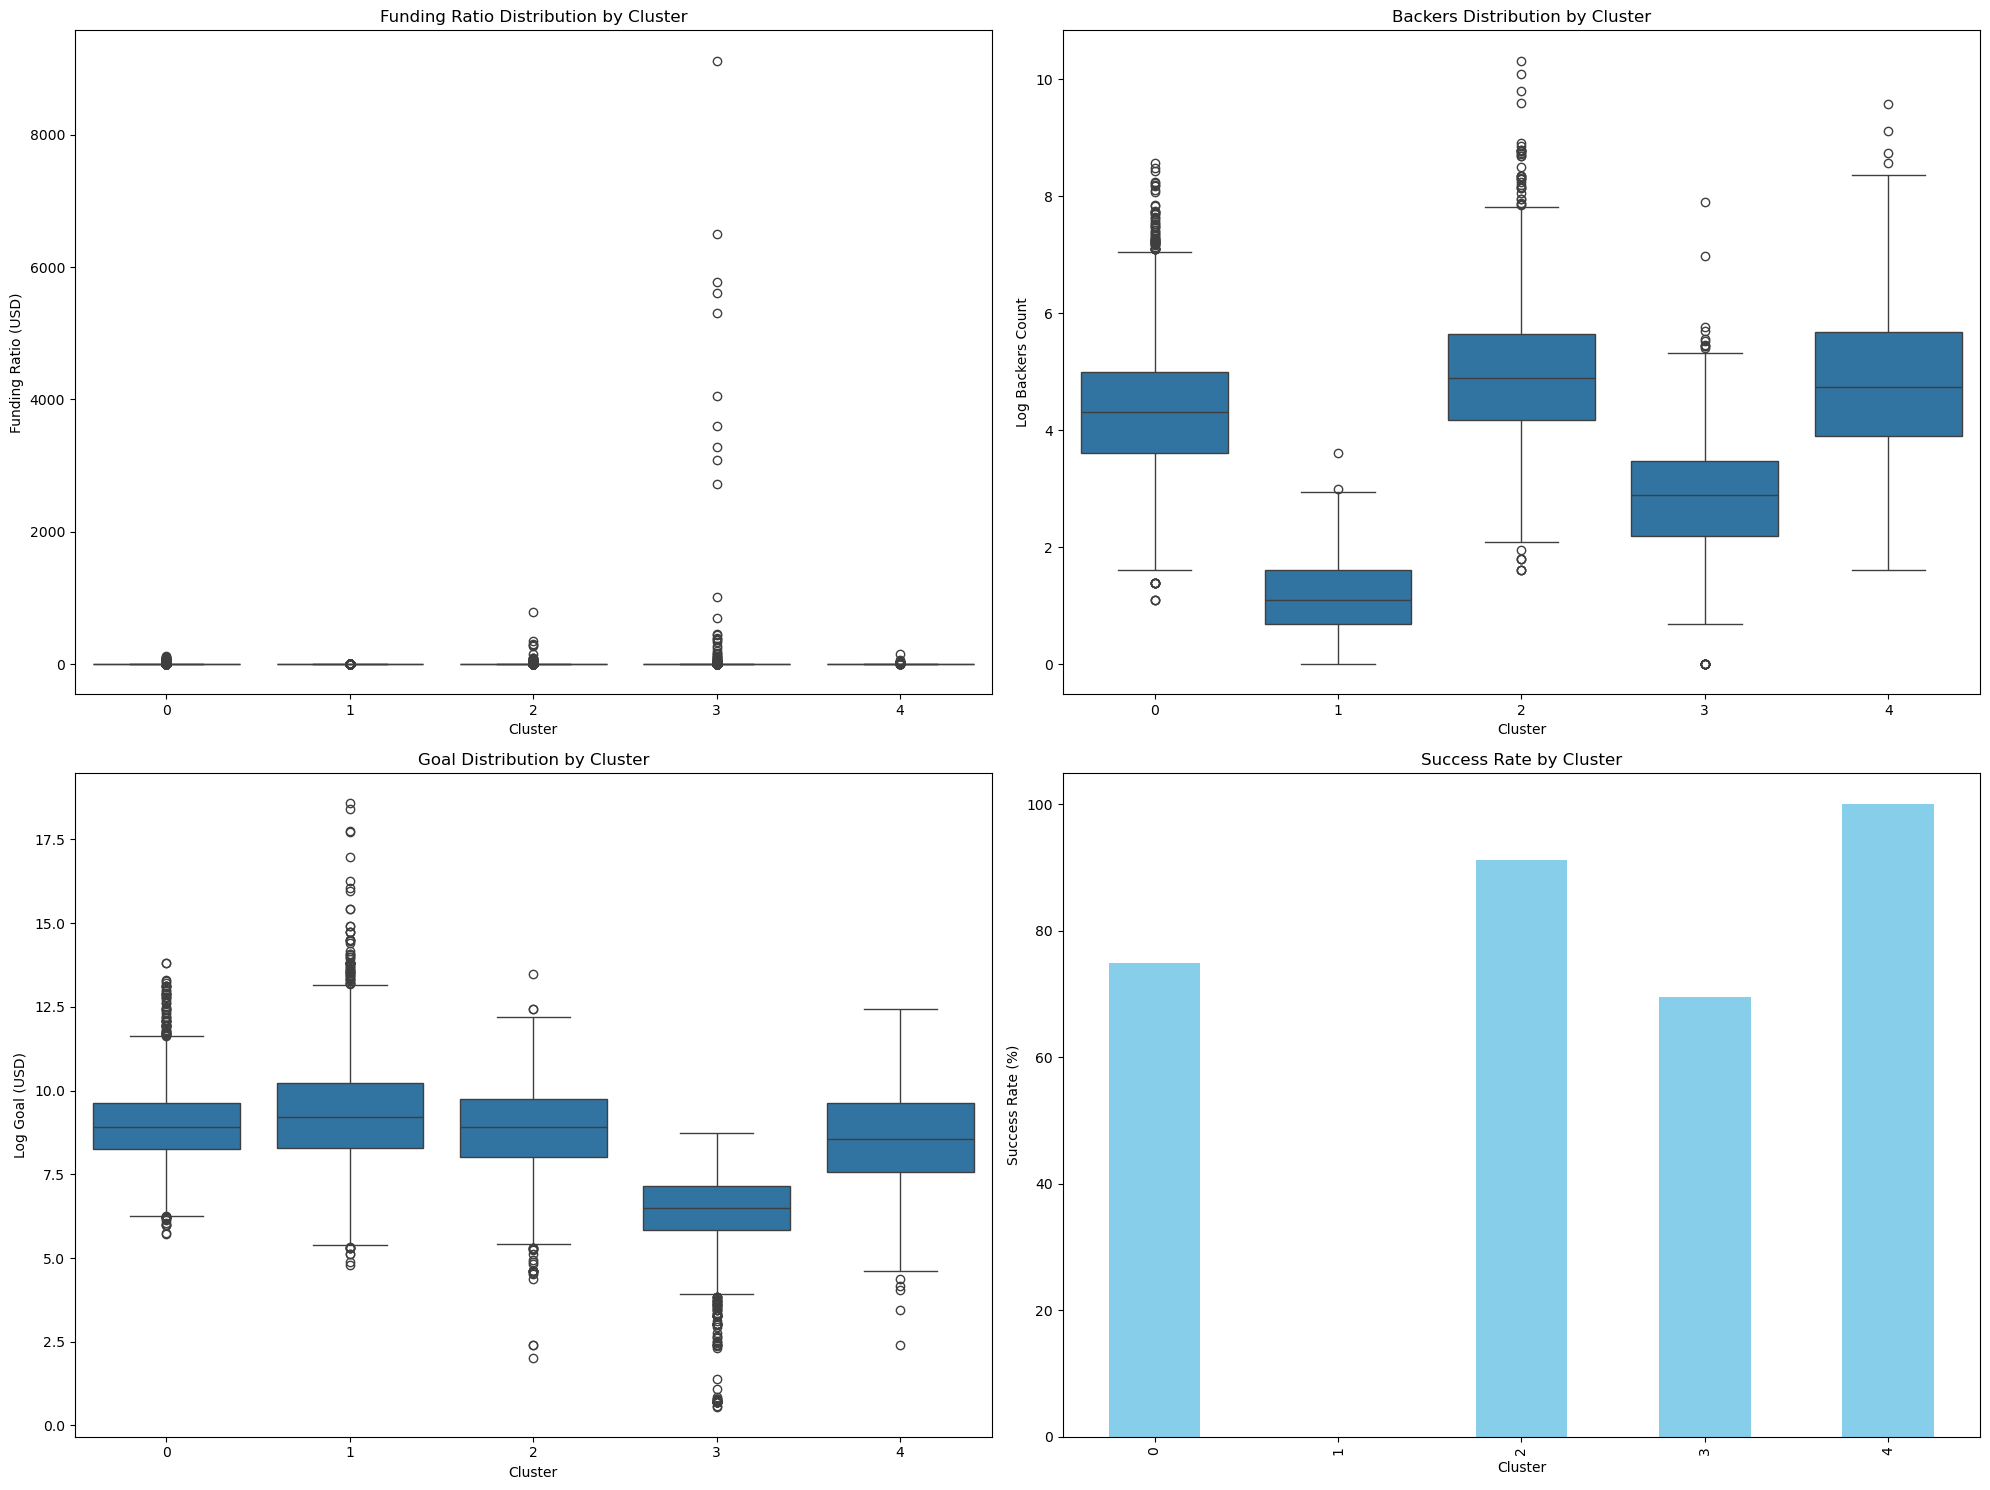

In [ ]:
# Compare clusters with visualizations
plt.figure(figsize=(20, 15))

# Funding Ratio by Cluster
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='cluster', y='funding_ratio_usd')
plt.title('Funding Ratio Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Funding Ratio (USD)')

# Backers Count by Cluster
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='cluster', y='log_backers')
plt.title('Backers Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Log Backers Count')

# Goal by Cluster
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='cluster', y='log_goal_usd')
plt.title('Goal Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Log Goal (USD)')

# Success Rate by Cluster
plt.subplot(2, 2, 4)
success_rate = df.groupby('cluster')['state'].apply(lambda x: (x == 'successful').mean() * 100)
success_rate.plot(kind='bar', color='skyblue')
plt.title('Success Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Success Rate (%)')

plt.tight_layout()
plt.show()


### Interpretation

Here's a comprehensive analysis of the 5-cluster solution:

1. **Mid-Range Video Cluster (0)** - "Standard Success Track"
- Size: 32.30% (4,672 projects) - Largest group
- Profile:
  * Success Rate: 74.87%
  * Goal: $7,500 (median)
  * Funding: $6,603 (median)
  * Ratio: 1.07x
  * Video: 78.98%
  * No images/staff picks
- Significance:
  * Represents typical successful pathway
  * Shows video is key for mid-range goals
  * Good success rate without staff picks
  * Sweet spot for standard projects

2. **High-Goal Failure Cluster (1)** - "Risk Zone"
- Size: 25.05% (3,623 projects)
- Profile:
  * Success Rate: 0%
  * Goal: $10,000 (median)
  * Funding: $21 (median)
  * Ratio: 0.00x
  * Video: 51.92%
  * No support features
- Significance:
  * Clear warning threshold at $10K
  * Shows insufficient media support
  * Demonstrates goal overreach
  * Identifies critical failure points

3. **Staff Pick Success Cluster (2)** - "Premium Track"
- Size: 13.37% (1,934 projects)
- Profile:
  * Success Rate: 91.21%
  * Goal: $7,509 (median)
  * Funding: $10,195 (median)
  * Ratio: 1.23x
  * Video: 84.23%
  * Staff Pick: 100%
- Significance:
  * Best performance metrics
  * Validates staff pick importance
  * Shows optimal feature combination
  * Template for high-goal success

4. **Low-Budget Mixed Cluster (3)** - "Entry Level"
- Size: 25.94% (3,752 projects)
- Profile:
  * Success Rate: 69.48%
  * Goal: $652 (median)
  * Funding: $732 (median)
  * Ratio: 1.10x
  * Video: 46.96%
  * Minimal features
- Significance:
  * Good entry point
  * Shows viability of small goals
  * Lower feature requirements
  * Safe starting strategy

5. **Complete Media Success Cluster (4)** - "Media Excellence"
- Size: 3.33% (482 projects)
- Profile:
  * Success Rate: 100%
  * Goal: $5,116 (median)
  * Funding: $9,183 (median)
  * Ratio: 1.31x
  * Video: 79.88%
  * Image: 100%
  * Staff Pick: 26.97%
- Significance:
  * Perfect success rate
  * Best funding ratio
  * Shows power of complete media
  * Optimal feature mix

**Strategic Framework:**

1. Goal Setting Strategy:
- Entry Level: $500-$1,000
- Standard Track: $5,000-$7,500
- Premium Track: $7,500-$10,000
- Risk Zone: >$10,000

2. Media Requirements by Goal:
- <$1,000: Basic media (40-50% video)
- $5,000-$7,500: Strong video (75-85%)
- $7,500+: Comprehensive media + staff pick
- $10,000+: Full feature set required

3. Success Probability Matrix:
```
Goal Range   | No Features | Video Only | Video+Staff Pick | Full Media
< $1,000     |    40-50%   |   65-70%   |      90%+       |   100%
$5K-$7.5K    |    <10%     |   70-75%   |      90%+       |   100%
$7.5K-$10K   |    <5%      |   60-65%   |      90%+       |   100%
> $10K       |    ~0%      |   <10%     |      80%+       |   90%+
```

4. Risk Assessment Framework:
- Low Risk:
  * Goals under $1,000
  * Any goal with staff pick
  * Full media projects under $7,500
- Medium Risk:
  * Video-only projects $5,000-$7,500
  * Staff pick projects over $10,000
- High Risk:
  * Any project over $10,000 without staff pick
  * Limited media projects over $5,000

**Business Recommendations:**

1. For Platform:
- Focus staff pick selection on $7,500-$10,000 projects
- Encourage media uploads for all projects over $5,000
- Implement goal warnings at $10,000 threshold
- Guide new creators to sub-$1,000 projects

2. For Creators:
- Start with sub-$1,000 projects to build track record
- Invest in video for anything over $5,000
- Secure staff pick before attempting over $7,500
- Use complete media strategy for optimal success

3. For Risk Management:
- Review all projects over $10,000 for viability
- Require media plan for high-goal projects
- Implement graduated feature requirements
- Monitor project health based on cluster metrics